In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB'
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
import os
os.getcwd()

'C:\\Users\\karthik'

In [7]:
os.chdir('C:\\Users\\karthik\\OneDrive\\Documents')

In [9]:
dataset = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [10]:
dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [11]:
columns_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
dataset.drop(columns=columns_to_drop, inplace=True)

In [12]:
dataset.columns = ['label', 'message']

In [13]:
dataset.shape

(5572, 2)

In [14]:
dataset=dataset.drop_duplicates()

In [15]:
dataset.shape

(5169, 2)

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5169 non-null   object
 1   message  5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [17]:
dataset.describe()

,label,message
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [18]:
dataset['label'].value_counts()

ham     4516
spam     653
Name: label, dtype: int64

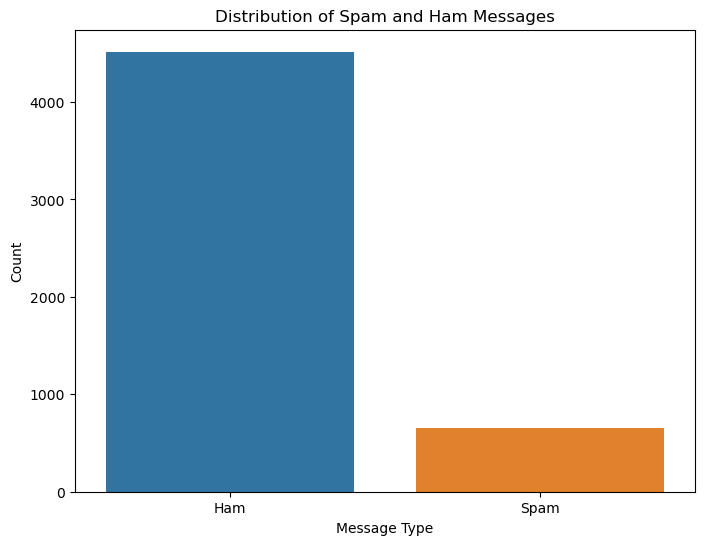

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='label')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.title('Distribution of Spam and Ham Messages')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

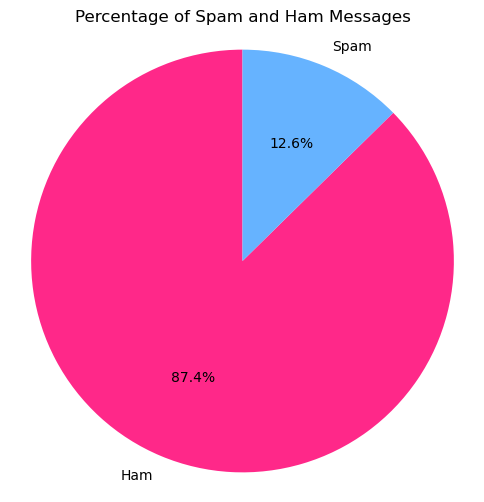

In [21]:
spam_count = dataset['label'].value_counts()[1]
ham_count = dataset['label'].value_counts()[0]
# Create a pie chart to show the percentage of spam and ham messages
plt.figure(figsize=(6, 6))
labels = ['Ham', 'Spam']
sizes = [ham_count, spam_count]
colors = ['#ff2889', '#66b3ff']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Spam and Ham Messages')
plt.axis('equal')  
plt.show()

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karthik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text
    words = text.split()
    # Remove stopwords
    words = [word for word in words if word not in set(stopwords.words('english'))]
    # Join the cleaned words back into a sentence
    cleaned_text = ' '.join(words)
    return cleaned_text

In [25]:
d_1 = dataset.copy()
d_1['message'] = d_1['message'].apply(lambda x: preprocess_text(x))

In [26]:
d_1['label'] = d_1['label'].map({'ham': 0, 'spam': 1})

In [27]:
d_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5169 non-null   int64 
 1   message  5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


In [28]:
X = d_1['message']  
y = d_1['label']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [31]:
#Naive bayes
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [32]:
X_test_counts = vectorizer.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
y_pred = clf.predict(X_test_tfidf)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy*100


97.09864603481626

In [34]:
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[889   0]
 [ 30 115]]


In [36]:
#prediction 
new_message = ["Congratulations, you've won a prize!"]
new_message_vectorized = vectorizer.transform(new_message)
prediction = clf.predict(new_message_vectorized)

if prediction[0] == 'spam':
    print("This is a spam message.")
else:
    print("This is not a spam message.")


This is not a spam message.
